# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [4]:
# TODO - we'll be doing this live, taking requests
# and reproducing what it is to look up and learn things
var1 = 1 + 1
print(var1)
print('A super cool change has been made!')

2
A super cool change has been made!


## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

In [0]:
# pandas
# matplotlib
# numpy
# seaborn
# sci-kit learn
# etc...
# check out the 'cool jupyter notebooks'
# TODO - your code here
# Use what we did live in lecture as an example


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [0]:
# copying a portion of the way that graphs were set up in Fourier Talk OSCON notebooks

def graph_setup(title, x_label, y_label, fig_size=None):
  fig = plt.figure()
  if fig_size != None:
    fig.set_size_inches(fig_size[0], fig_size[1])
  ax = fig.add_subplot(111)
  ax.set_title(title)
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)

In [0]:
# Defining a wave that makes nice graphs:

freq = 1
amp = 2
plot_len = 4 # seconds
sample_rate = 400 #samples per second passed to array generator. increased to
                  #400 to allow for higher frequency waves to display correctly
total_samples = sample_rate * plot_len

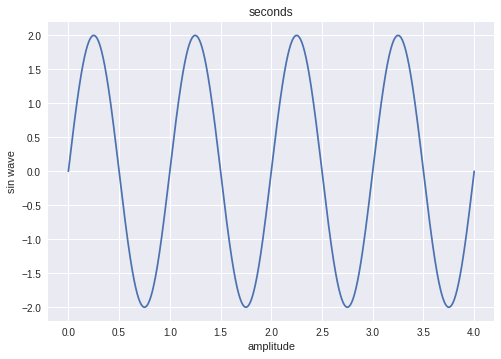

In [7]:
t = np.linspace(0, plot_len, total_samples)  #generate array of x's to sample
signal = [amp * np.sin(freq * i * 2 * np.pi) for i in t] # wave of given freq.

graph_setup('seconds', 'amplitude', 'sin wave')
plt.plot(t,signal)

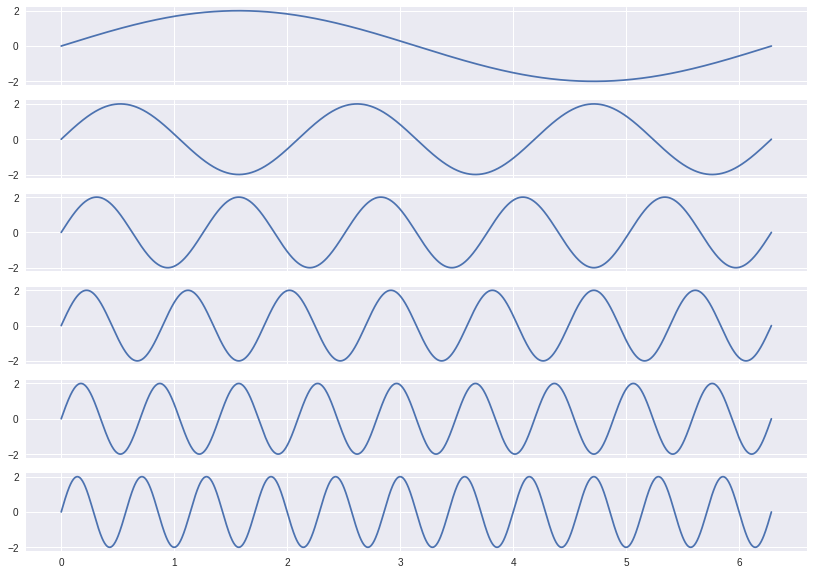

In [8]:
# Generate series of sin waves whose frequencies increase by 2 Hz from 
# the previous so that the previous wave's peak and next wave's trough coincide
# Odd multipliers in this case


t2 = np.linspace(0, 2 * np.pi, total_samples)
sig1 = amp * np.sin(freq * t2)
sig2 = amp * np.sin(3 * freq * t2)
sig3 = amp * np.sin(5 * freq * t2)
sig4 = amp * np.sin(7 * freq * t2)
sig5 = amp * np.sin(9 * freq * t2)
sig6 = amp * np.sin(11 * freq * t2)

f, subax = plt.subplots(6, sharex=True, sharey=True)
f.set_size_inches(14,10)
subax[0].plot(t2, sig1)
subax[1].plot(t2, sig2)
subax[2].plot(t2, sig3)
subax[3].plot(t2, sig4)
subax[4].plot(t2, sig5)
subax[5].plot(t2, sig6)
plt.show()

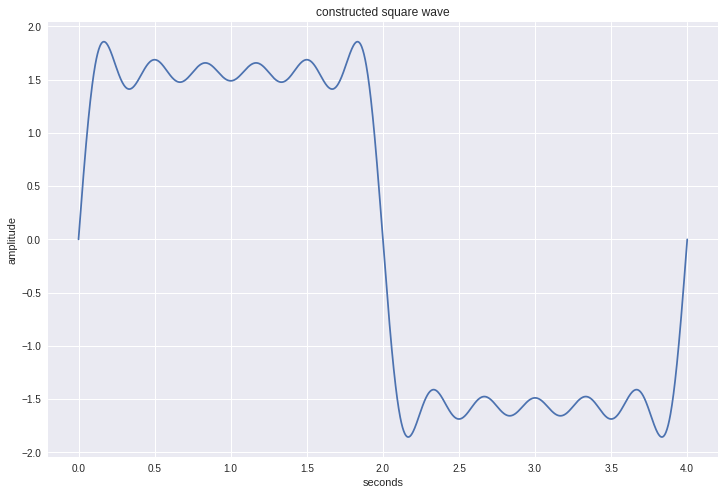

In [9]:
# Make a square wave! 

square = (sig1) + (sig2/3) + (sig3/5) + (sig4/7) + (sig5/9) + (sig6/11)
test = sig1 + sig2 + sig3 + sig4 + sig5 + sig6
graph_setup('constructed square wave', 'seconds', 'amplitude', fig_size=(12,8))
plt.plot(t,square)

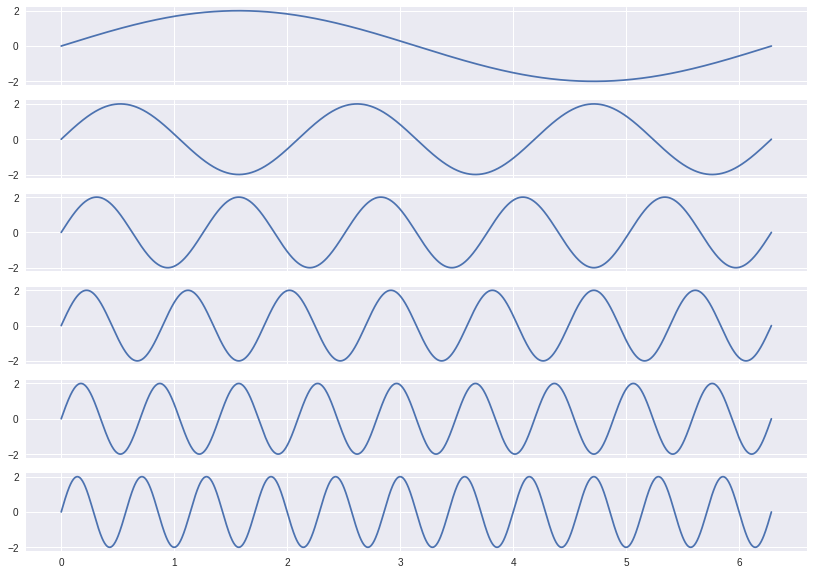

In [10]:
# sine wave harmonic series of signals for constructing a sawtooth wave.
# note even frequency multipliers

t2 = np.linspace(0, 2 * np.pi, total_samples)
sig1a = amp * np.sin(2 *freq * t2)
sig2a = amp * np.sin(4 * freq * t2)
sig3a = amp * np.sin(6 * freq * t2)
sig4a = amp * np.sin(8 * freq * t2)
sig5a = amp * np.sin(10 * freq * t2)
sig6a = amp * np.sin(12 * freq * t2)

f, subax = plt.subplots(6, sharex=True, sharey=True)
f.set_size_inches(14,10)
subax[0].plot(t2, sig1)
subax[1].plot(t2, sig2)
subax[2].plot(t2, sig3)
subax[3].plot(t2, sig4)
subax[4].plot(t2, sig5)
subax[5].plot(t2, sig6)
plt.show()

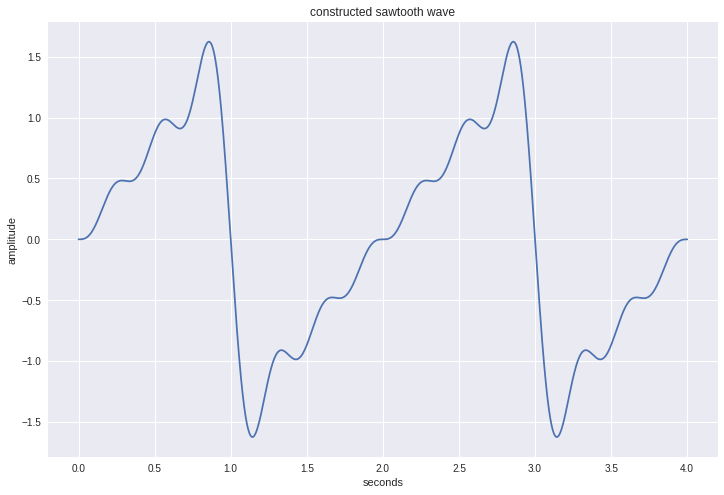

In [11]:
sawtooth = (sig1a/2) + (sig2a/-4) + (sig3a/6) + (sig4a/-8) + (sig5a/10) + (sig6a/-12)
graph_setup( 'constructed sawtooth wave', 'seconds', 'amplitude', fig_size=(12,8))
plt.plot(t, sawtooth)

In [0]:

fourier_transform_output = np.fft.rfft(sawtooth)
magnitude_only = [np.sqrt(i.real**2 + i.imag**2)/len(fourier_transform_output) for i in fourier_transform_output]
frequencies = [(i*1.0/total_samples)*sample_rate for i in range(total_samples//2+1)]

<BarContainer object of 801 artists>

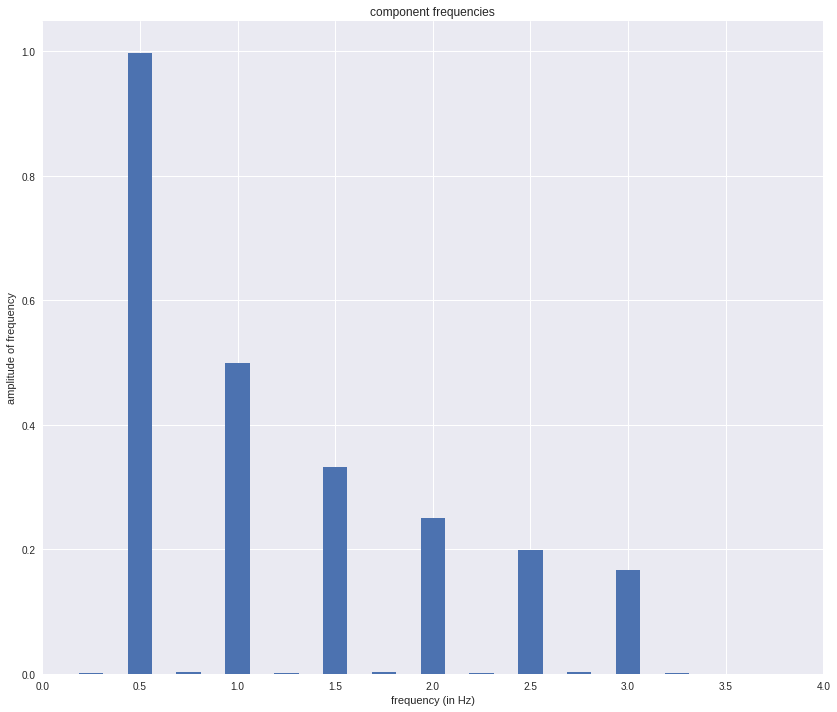

In [38]:
graph_setup('component frequency breakdown of approximate sawtooth wave', 'frequency (in Hz)', 'amplitude of frequency', fig_size=(14,12))
plt.xlim(0,4)
plt.bar(frequencies, magnitude_only, align='center', width=.125)

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?




# 1.
Starting with code from the "Fourier Talk OSCON" notebook, I used the structure of the code from 02_NatureOfWaves.ipynb and modified it to produce my own truncated fourier searies to construct an approximation of a square wave. I took a class on the physics of sound a year and a half ago, and we used Wolfram Mathematica in that class, so I want to learn more about how to use python to do some of the same things that we did with mathematca. I did a simple demonstration of a fourier searies today because showing how the addition of sin waves to make a square wave is my favorite demonstration of how fourier searies and transformations work. The approximation of a sawtoothe wave is built similarly, and then broken down into component frequencies with numpy's fast fourier transform function and then graphed by frequency and amplitude. Note how amplitude of the component frequencies corresponds to what each input frequency was divided by. 

Of note, the higher the frequency of the sign wave, the less of an effect it typically has on the final product. This is how several forms of lossy audio and image compression work: they split out the original wave into sin waves using fourier transforms and cut off some quantity of the higher frequency waves, leaving an approximation of the original that can be reconstructed by the above method.

# 2.
The most challenging aspect of this was probably debugging  my code after typing out a copy from the original ipynb. I didn't like some of the author's variable names, so I changed them, but once the page got long I had to remember what I had named things at the top. Also figuring out how numpy handles fourier transforms, and trying to build a truncated fourier series from the addition of sin functions was challenging. I had to google which harmonic series to use for the sawtooth wave. I'm also not entirely sure how to work with integrals in python yet.

# 3. 
I like how simple the fourier transform functions are in numpy, if i'm remembering right, mathematica needed a lot of parameters set or else it wouldn't work(their functions didn't have good defaults or something along those lines)

#4
I could get sidetracked on this topic for quite a while. I could figure out how to input an actual audio file, use fourier transform to break it down and make a demonstration compression algorithm. This might be a good project idea for the future? I could set up an integral to make something close as a computer can get to a non-truncated series. In short, I would like to learn how to do more advanced mathematics on python than I am currently capable of.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.

# Check out quandl

damerei's github:
https://github.com/damerei

quandl:
https://github.com/damerei